In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import os
import json
from datetime import datetime as dt
import seaborn as sns; sns.set()
from calendar import monthrange

SMALL_SIZE = 20
MEDIUM_SIZE = 30
BIGGER_SIZE = 40

plt.rc('lines', linewidth=3)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
COLLECTION_DATE = pd.to_datetime('9 April, 2020')
EARLIEST_DATE = pd.to_datetime('23 August, 2019')
MIN_REVIEWS = 50

DATA_DIR = "../data/"
data = []
for fname in os.listdir(DATA_DIR):
    fname = os.path.join(DATA_DIR, fname)
    with open(fname) as f:
        _js_data = json.load(f)
    _data = pd.DataFrame(_js_data['reviews'])
    _data['app'] = _js_data['title']
    data.append(_data)

In [2]:
data = pd.concat(data)
data["date"] = pd.to_datetime(data.date)
data = data[data.date >= EARLIEST_DATE]

In [14]:
for row in data.loc[data.app == 'Babylon Health Services-Digital GP & Healthcheck'].to_dict(orient='rows'):
    print(row["reviewer"], row["date"])
    print()
    print(row["review"])
    print("\n\n============================\n\n")

Michael Klamo 2020-04-04 00:00:00

Great service for sure. I found the experience to be really easy to use. The symptom checker was fast and gave me options on what to do next. Thats when I decided to book an appointment and by some miracle I was able to have a video chat with a doctor within 15 minutes. She gave me a clear explanation about what I was suffering. With some painkillers now I feel better within 30 minutes - traditionally I would have to waited much longer to get a solution.




Destiny Adeyemi 2020-03-25 00:00:00

The app is pretty easy to use and has a sleek design. I would recommend having sections dedicated to listing all the medication you have been prescribed and all the summaries for your appointments, which you can search through, as I can only find this through notifications . A web app or desktop access would also be helpful.




Georgina Wilks-Wiffen 2020-03-21 00:00:00

Always updating and improving. I'm someone who needs to speak to doctors often due to medic

In [3]:
#data.groupby('app').plot.
#data.plot.hist(by=)
data['Month of review'] = pd.to_datetime(data['date']) - pd.to_timedelta(7, unit='d')
#df = data.groupby(['app', pd.Grouper(key='Month', freq='MS')]).count().reset_index().sort_values('Month')

total_reviews = data.groupby("app").count().to_dict()["Month of review"]

_df = []
for (app, month), grouped in data.groupby(['app', pd.Grouper(key='Month of review', freq='MS')]):
    if total_reviews[app] < MIN_REVIEWS:
        continue
    _, days = monthrange(month.year, month.month)    
    if month.year == COLLECTION_DATE.year and month.month == COLLECTION_DATE.month:
        days = COLLECTION_DATE.day
        print(len(grouped), days)
    row = {"Reviews": len(grouped), "Reviews per day": len(grouped)/days, 
           "Month of review":month, "App": app, "Order":total_reviews[app]}
    _df.append(row)
df = pd.DataFrame(_df)
df = df.sort_values(by="Order", ascending=False)

3 9
10 9
1 9
3 9


In [4]:
total_reviews

{'Ask NHS': 88,
 'Babylon Health Services-Digital GP & Healthcheck': 20,
 'LIVI – See a Doctor in minutes': 177,
 'NHS App': 461,
 'Patient Access': 1320,
 'Push Doctor - Online Doctor Appointments & Advice': 20,
 'SystmOnline': 54,
 'myGP® - Book NHS GP appointments': 717}

(737272.0, 737525.0)

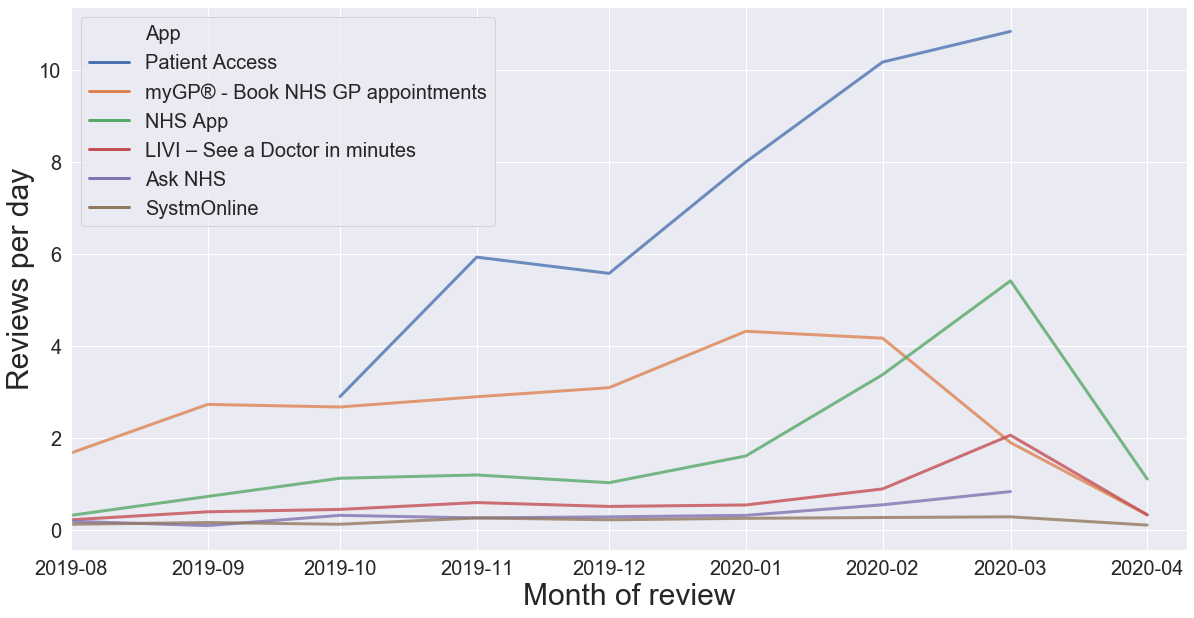

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Month of review', y='Reviews per day', hue='App', data=df, ax=ax, alpha=0.8)
ax.set_xlim(pd.Timestamp(day=1, month=8, year=2019), pd.Timestamp(day=10, month=4, year=2020))

In [6]:
# try to understand if missing data from most recent?

In [7]:
# Length of feedback vs star rating
# Average length of feedback over time
# Star rating over time
# What terms are most predictive of past compared to present
# What terms are most predictive of +ve vs -ve feedback
# What terms are most predictive of +ve vs -ve in one month windows
# Counts of reviews over time by app
# Counts of reviews over time by star rating app
# Ratio of +ve to -ve vocab fraction over time (1 month bins)
# Ditto, by app
